In [1]:
import numpy as np
import progressbar
import matplotlib.pyplot as plt

In [2]:
def gerchberg_saxton(target_amp, source_amp=None, n_iter=100):
    """
    Iterative Fourier transform algorithm to determine phase pattern given
    a Fourier relationship between source and target plane.
    Parameters
    ----------
    target_amp : array_like
        Target amplitude.
    source_amp : array_like
        Source amplitude, e.g. beam shape.
    n_iter : int
        Number of iterations to run algorithm.
    """

    Nx = target_amp.shape[1]
    Ny = target_amp.shape[0]

    # initialize source if necessary
    if source_amp is None:
        source_amp = np.ones((Ny, Nx))

    # - assumes FT as prop model, namely focus plane of lens
    # - inverse to go back to source plane
    target_amp = np.abs(np.fft.ifftshift(target_amp))
    source_amp = np.abs(np.fft.ifftshift(source_amp))
    source_field = np.fft.ifft2(target_amp)

    bar = progressbar.ProgressBar()
    for _ in bar(range(n_iter)):

        # amplitude constraint at source
        source_field = source_amp * np.exp(1j * np.angle(source_field))

        # could replace with other propagater
        target_field = np.fft.fft2(source_field)

        # amplitude contraint at target
        target_field = target_amp * np.exp(1j * np.angle(target_field))

        # update source phase
        source_field = np.fft.ifft2(target_field)

    source_phase = np.fft.fftshift(np.angle(source_field))

    return source_phase

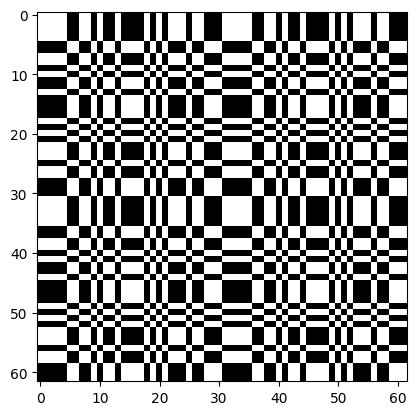

In [18]:
mask = np.load('../FlatCam/MLS/MLS_5bits.npy')
plt.imshow(mask, cmap='gray')

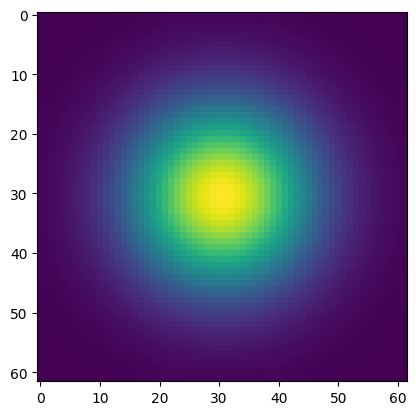

In [21]:
x = np.linspace(-2, 2, mask.shape[0])
y = np.linspace(-2, 2, mask.shape[1])
xx, yy = np.meshgrid(x, y)
zz = np.exp(-(xx**2 + yy**2))
plt.imshow(zz)

100% |########################################################################|


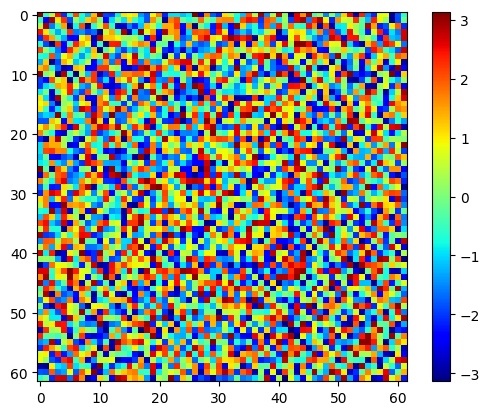

In [23]:
phase_map = gerchberg_saxton(mask, zz)
plt.imshow(phase_map, cmap='jet')
plt.colorbar()

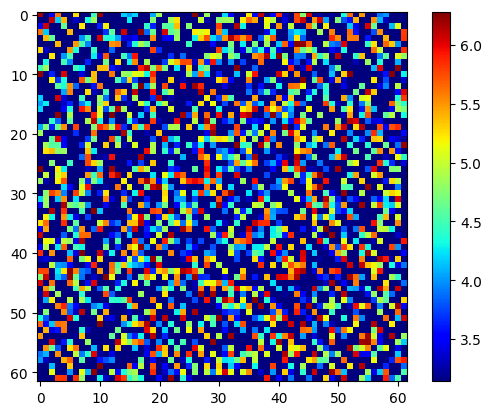

In [24]:
phase_map += (phase_map < 0) * (- phase_map) + np.pi
plt.imshow(phase_map, cmap='jet')
plt.colorbar()